#Chatbot using python

A computer program designed to simulate conversation with human users

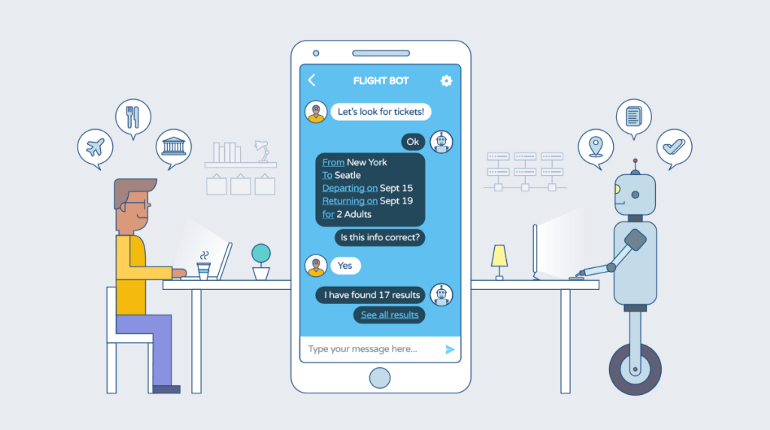

Chatbots can be categorized into two category

1. Rule-Based

2. Self-learning

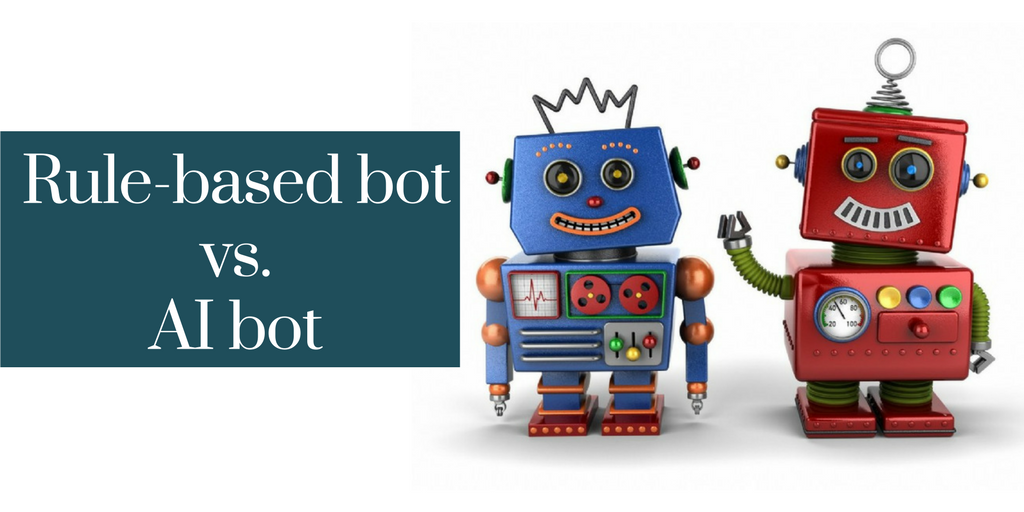

In a Rule-based approach, a bot answers questions based on some rules, which it is trained on. 

The rules defined can be very simple to very complex. The bots can handle simple queries but fail to manage complex ones

*Self-learning bots are the ones that use some Machine Learning-based approaches and are more efficient than rule-based bots*

#Chatterbot

Chatterbot is a python library designed to deliver automated responses to the user inputs.

Steps in creating our chatbot:

1. Importing necessary libraries
2. Creating an instance of Chatbot
3. Loading data
4. Training our model
5. Testing with input

In [1]:
%pip install chatterbot
%pip install chatterbot_corpus

     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 1.3MB 8.9MB/s 
  Found existing installation: SQLAlchemy 1.4.15
    Uninstalling SQLAlchemy-1.4.15:
      Successfully uninstalled SQLAlchemy-1.4.15
     |████████████████████████████████| 122kB 5.0MB/s 


Importing necessary libraries

In [2]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer
print("Required modules are successfully imported....")

Required modules are successfully imported....


Create object of ChatBot class

In [7]:
my_bot = ChatBot(name='MyBot', read_only=True,
                 logic_adapters=['chatterbot.logic.MathematicalEvaluation',
                                 'chatterbot.logic.BestMatch'])

Loading data

In [4]:
talk1 = ['hi there!',
              'hi!',
              'how do you do?',
              'Cool as always'
              'how are you?',
              'i\'m cool.',
              'fine, you?',
              'always cool.',
              'i\'m ok',
              'glad to hear that.',
              'i\'m fine',
              'glad to hear that.',
              'i feel awesome',
              'excellent, glad to hear that.',
              'good',
              'Thats awesome to hear'
              'not so good',
              'sorry to hear that.',
              'I need your assistance regarding my order',
              'Please, Provide me with your order id',
              'I have a complaint.',
              'Please elaborate, your concern',
              'How long it will take to receive an order ?',
              'An order takes 3-5 Business days to get delivered.',
              'The product delivered is damaged',
              'Oh! we are really sorry for! please provide your order id we will replace it for you',
              'Okay Thanks',
              'No Problem! Have a Good Day!'
              'what\'s your name?',
              'i\'m your bot. Ask me a math question, please.']

In [5]:
talk2 = ['pythagorean theorem',
               'a squared plus b squared equals c squared.']

Training our model

In [8]:
list_trainer = ListTrainer(my_bot)
for item in (talk1, talk2):
    list_trainer.train(item)
print("Training of chatbot is completed")

List Trainer: [####################] 100%
List Trainer: [####################] 100%
Training of chatbot is completed


Testing with input

In [9]:
print(my_bot.get_response("how are you"))

Cool as alwayshow are you?


In [10]:
name=input("Enter Your Name: ")
print("Hey welcome " + name + "! Let's chat!!!")
while True:
    request=input(name+':')
    if request=='Bye' or request =='bye':
        print('Bot: Ok Bye. See you then!!')
        break
    else:
        response=my_bot.get_response(request)
        print('Bot:',response)

Enter Your Name: Keerthana
Hey welcome Keerthana! Let's chat!!!
Keerthana:Hi
Bot: how do you do?
Keerthana:Fine
Bot: glad to hear that.
Keerthana:bye
Bot: Ok Bye. See you then!!


Chatterbot Corpus

In [11]:
from chatterbot.trainers import ChatterBotCorpusTrainer
corpus_trainer = ChatterBotCorpusTrainer(my_bot)
corpus_trainer.train('chatterbot.corpus.english')

Training ai.yml: [####################] 100%
Training botprofile.yml: [####################] 100%
Training computers.yml: [####################] 100%
Training conversations.yml: [####################] 100%
Training emotion.yml: [####################] 100%
Training food.yml: [####################] 100%
Training gossip.yml: [####################] 100%
Training greetings.yml: [####################] 100%
Training health.yml: [####################] 100%
Training history.yml: [####################] 100%
Training humor.yml: [####################] 100%
Training literature.yml: [####################] 100%
Training money.yml: [####################] 100%
Training movies.yml: [####################] 100%
Training politics.yml: [####################] 100%
Training psychology.yml: [####################] 100%
Training science.yml: [####################] 100%
Training sports.yml: [####################] 100%
Training trivia.yml: [####################] 100%


In [12]:
print(my_bot.get_response("tell me a joke"))

Did you hear the one about the mountain goats in the andes? It was "ba a a a a a d".


In [ ]:
name=input("Enter Your Name: ")
print("Welcome to the Bot Service! Let me know how can I help you?")
while True:
    request=input(name+':')
    if request=='Bye' or request =='bye':
        print('Bot: Bye')
        break
    else:
        response=my_bot.get_response(request)
        print('Bot:',response)

# NLTK

We are going to build a simple chatbot using nltk library

( Natural Language Toolkit). 

It is a leading platform for building Python programs to work with human language data.

Importing Required Libraries

In [14]:
import numpy as np
import random
import json
import nltk
from nltk.stem.porter import PorterStemmer #stemming convert words to root words

In [15]:
nltk.download('punkt')  #tokenize split sentence into words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [19]:
stemmer = PorterStemmer()

def tokenize(sentence):
    return nltk.word_tokenize(sentence)

def stem(word):
    return stemmer.stem(word.lower())

def bag_of_words(tokenized_sentence, words):
    # stem each word
    sentence_words = [stem(word) for word in tokenized_sentence]
    # initialize bag with 0 for each word
    bag = np.zeros(len(words), dtype=np.float32)
    for idx, w in enumerate(words):
        if w in sentence_words: 
            bag[idx] = 1
    return bag

In [20]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.l2 = nn.Linear(hidden_size, hidden_size) 
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out

In [21]:
with open('intents.json', 'r') as f:
    intents = json.load(f)

In [23]:
all_words = []
tags = []
xy = []
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    tag = intent['tag']
    # add to tag list
    tags.append(tag)
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = tokenize(pattern)
        # add to our words list
        all_words.extend(w)
        # add to xy pair
        xy.append((w, tag))

In [24]:
# stem and lower each word
ignore_words = ['?', '.', '!']
all_words = [stem(w) for w in all_words if w not in ignore_words]
# remove duplicates and sort
all_words = sorted(set(all_words))
tags = sorted(set(tags))

print(len(xy), "patterns")
print(len(tags),"tags")
print(len(all_words),"words")

26 patterns
7 tags
54 words


In [25]:
print(xy)

[(['Hi'], 'greeting'), (['Hey'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['Thanks'], 'thanks'), (['Thank', 'you'], 'thanks'), (['That', "'s", 'helpful'], 'thanks'), (['Thank', "'s", 'a', 'lot', '!'], 'thanks'), (['Which', 'items', 'do', 'you', 'have', '?'], 'items'), (['What', 'kinds', 'of', 'items', 'are', 'there', '?'], 'items'), (['What', 'do', 'you', 'sell', '?'], 'items'), (['Do', 'you', 'take', 'credit', 'cards', '?'], 'payments'), (['Do', 'you', 'accept', 'Mastercard', '?'], 'payments'), (['Can', 'I', 'pay', 'with', 'Paypal', '?'], 'payments'), (['Are', 'you', 'cash', 'only', '?'], 'payments'), (['How', 'long', 'does', 'delivery', 'take', '?'], 'delivery'), (['How', 'long', 'does', 'shipping', 'take', '?'], 'delivery'), (['When', 'do', 'I', 'get', 'my', 'delivery', '?'], 'delivery'),

In [26]:
print(tags)

['delivery', 'funny', 'goodbye', 'greeting', 'items', 'payments', 'thanks']


In [27]:
print(all_words)

["'s", 'a', 'accept', 'anyon', 'are', 'bye', 'can', 'card', 'cash', 'credit', 'day', 'deliveri', 'do', 'doe', 'funni', 'get', 'good', 'goodby', 'have', 'hello', 'help', 'hey', 'hi', 'how', 'i', 'is', 'item', 'joke', 'kind', 'know', 'later', 'long', 'lot', 'mastercard', 'me', 'my', 'of', 'onli', 'pay', 'paypal', 'see', 'sell', 'ship', 'someth', 'take', 'tell', 'thank', 'that', 'there', 'what', 'when', 'which', 'with', 'you']


Training

In [28]:
# create training data
X_train = []
y_train = []
for (pattern_sentence, tag) in xy:
    # X: bag of words for each pattern_sentence
    bag = bag_of_words(pattern_sentence, all_words)
    X_train.append(bag)
    # y: PyTorch CrossEntropyLoss needs only class labels, not one-hot
    label = tags.index(tag)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [29]:
# Hyper-parameters 
num_epochs = 1000
batch_size = 8  
learning_rate = 0.001
input_size = len(X_train[0])
hidden_size = 8
output_size = len(tags)
print(input_size, output_size)

54 7


In [30]:
class ChatDataset(Dataset):
    def __init__(self):
        self.n_samples = len(X_train)
        self.x_data = X_train
        self.y_data = y_train

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.n_samples

In [31]:
dataset = ChatDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

model = NeuralNet(input_size, hidden_size, output_size).to(device)

In [32]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
# Train the model
for epoch in range(num_epochs):
    for (words, labels) in train_loader:
        words = words.to(device)
        labels = labels.to(dtype=torch.long).to(device)
        
        # Forward pass
        outputs = model(words)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 100 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print(f'final loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.5493
Epoch [200/1000], Loss: 0.0347
Epoch [300/1000], Loss: 0.0126
Epoch [400/1000], Loss: 0.0050
Epoch [500/1000], Loss: 0.0080
Epoch [600/1000], Loss: 0.0027
Epoch [700/1000], Loss: 0.0003
Epoch [800/1000], Loss: 0.0006
Epoch [900/1000], Loss: 0.0014
Epoch [1000/1000], Loss: 0.0000
final loss: 0.0000


In [34]:
data = {
"model_state": model.state_dict(),
"input_size": input_size,
"hidden_size": hidden_size,
"output_size": output_size,
"all_words": all_words,
"tags": tags
}

FILE = "data.pth"
torch.save(data, FILE)

print(f'Training complete. File saved to {FILE}')

Training complete. File saved to data.pth


In [35]:
data = torch.load(FILE)

input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_words = data['all_words']
tags = data['tags']
model_state = data["model_state"]

model.load_state_dict(model_state)
model.eval()

NeuralNet(
  (l1): Linear(in_features=54, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=8, bias=True)
  (l3): Linear(in_features=8, out_features=7, bias=True)
  (relu): ReLU()
)

In [36]:
bot_name = "Doremon"
print("Let's chat! (type 'quit' to exit)")
while True:
    sentence = input("You: ")
    if sentence == "quit":
        break

    sentence = tokenize(sentence)
    X = bag_of_words(sentence, all_words)
    X = X.reshape(1, X.shape[0])
    X = torch.from_numpy(X).to(device)

    output = model(X)
    _, predicted = torch.max(output, dim=1)

    tag = tags[predicted.item()]

    probs = torch.softmax(output, dim=1)
    prob = probs[0][predicted.item()]
    if prob.item() > 0.75:
        for intent in intents['intents']:
            if tag == intent["tag"]:
                print(f"{bot_name}: {random.choice(intent['responses'])}")
    else:
        print(f"{bot_name}: I do not understand...")

Let's chat! (type 'quit' to exit)
You: hi
Doremon: Hi there, how can I help?
You: quit
